# Ejercicio de programación Regresión Polinomial

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=";",skiprows=1)
#print(data)
X = data[:, :1]
y = data[:, 1]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
#for i in range(10):
#    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

In [4]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
print(X.shape)
X = pf.fit_transform(X.reshape(-1,1))  # transformamos la entrada en polinómica
print(X.shape)
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y)

# vemos los parámetros que ha estimado la regresión lineal
print('theta = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

# resultado: w = [0 -4.54 4.95 0.1], b = -57.52

(20, 1)
(20, 4)
theta = [ 0.00000000e+00 -7.01887847e+02  4.15205454e+01 -4.20149546e-01], b = 1732.255536023852


In [5]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 13738576.542839069
Raíz del Error Cuadrático Medio (RMSE) = 3706.5585848383766
Coeficiente de Determinación R2 = 0.8000565797601462


In [6]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


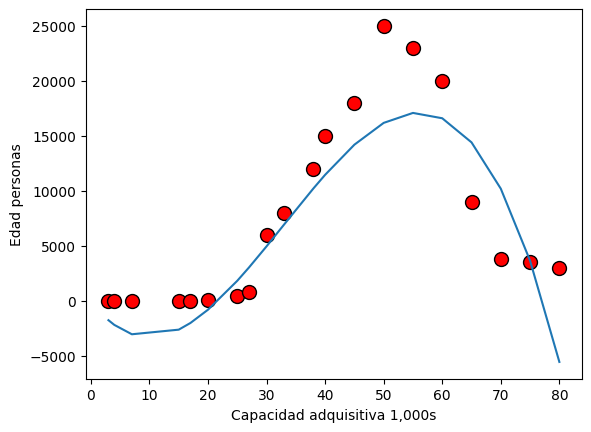

In [7]:
plotData(X[:,1], y)
pyplot.plot(X[:, 1], np.dot(X, regresion_lineal.coef_), '-')

In [8]:
X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X_array = pf.fit_transform(X_array.reshape(-1,1))
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[3570.56358448]
